# 1. LeNet-1 [Accuracy: 0.9458] 

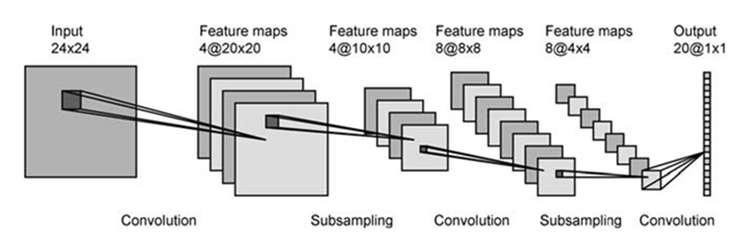

In [1]:
from IPython.display import Image
Image('images/LeNet1.png')

In [2]:
# Lab 11 MNIST and Deep learning CNN
import tensorflow as tf
# import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data

tf.set_random_seed(777)  # reproducibility

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
# hyper parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 128

In [4]:
class Model:

    def __init__(self, sess, name):
        self.sess = sess
        self.name = name
        self._build_net()

    def _build_net(self):
        with tf.variable_scope(self.name):
            # for testing
            self.training = tf.placeholder(tf.bool)

            # input place holders
            self.X = tf.placeholder(tf.float32, [None, 784])

            # img 28x28x1 (black/white), Input Layer
            X_img = tf.reshape(self.X, [-1, 28, 28, 1])
            self.Y = tf.placeholder(tf.float32, [None, 10])

            # Convolutional Layer #1
            conv1 = tf.layers.conv2d(inputs=X_img, filters=4, kernel_size=[5, 5],
                                     activation=tf.nn.relu)
            # Pooling Layer #1
            pool1 = tf.layers.average_pooling2d(inputs=conv1, pool_size=[2, 2],
                                            strides=2)
            dropout1 = tf.layers.dropout(inputs=pool1,
                                         rate=0.7, training=self.training)

            # Convolutional Layer #2 and Pooling Layer #2
            conv2 = tf.layers.conv2d(inputs=dropout1, filters=12, kernel_size=[5, 5],
                                     activation=tf.nn.relu)
            pool2 = tf.layers.average_pooling2d(inputs=conv2, pool_size=[2, 2],
                                            strides=2)
            dropout2 = tf.layers.dropout(inputs=pool2,
                                         rate=0.7, training=self.training)

            # Dense Layer with Relu
            flat = tf.reshape(dropout2, [-1, 12 * 4 * 4])

            # Logits (no activation) Layer: L5 Final FC 192 inputs -> 10 outputs
            self.logits = tf.layers.dense(inputs=flat, units=10)

        # define cost/loss & optimizer
        self.cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
            logits=self.logits, labels=self.Y))
        self.optimizer = tf.train.AdamOptimizer(
            learning_rate=learning_rate).minimize(self.cost)

        correct_prediction = tf.equal(
            tf.argmax(self.logits, 1), tf.argmax(self.Y, 1))
        self.accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    def predict(self, x_test, training=False):
        return self.sess.run(self.logits, feed_dict={
            self.X: x_test, self.training: training})

    def get_accuracy(self, x_test, y_test, training=False):
        return self.sess.run(self.accuracy, feed_dict={
            self.X: x_test, self.Y: y_test, self.training: training})

    def train(self, x_data, y_data, training=True):
        return self.sess.run([self.cost, self.optimizer], feed_dict={
            self.X: x_data, self.Y: y_data, self.training: training})

In [5]:
# initialize
config = tf.ConfigProto()
config.gpu_options.allow_growth=True
sess = tf.Session(config=config)
m1 = Model(sess, "m1")

sess.run(tf.global_variables_initializer())

print('Learning Started!')

Learning Started!


In [6]:
# train my model
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        c, _ = m1.train(batch_xs, batch_ys)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished!')

Epoch: 0001 cost = 1.488315283
Epoch: 0002 cost = 0.837290588
Epoch: 0003 cost = 0.719576422
Epoch: 0004 cost = 0.666413031
Epoch: 0005 cost = 0.647487110
Epoch: 0006 cost = 0.623470175
Epoch: 0007 cost = 0.612076566
Epoch: 0008 cost = 0.602341476
Epoch: 0009 cost = 0.591645881
Epoch: 0010 cost = 0.581928446
Epoch: 0011 cost = 0.578089480
Epoch: 0012 cost = 0.573015368
Epoch: 0013 cost = 0.559991227
Epoch: 0014 cost = 0.563024098
Epoch: 0015 cost = 0.545246407
Learning Finished!


In [8]:
# Test model and check accuracy
print('Accuracy:', m1.get_accuracy(mnist.test.images, mnist.test.labels))

Accuracy: 0.9458
